# Question 1: Bernoulli Factories

Let the probability of reaching Step 1 from any step be 'x'.\\
We obtain:
$$
x \frac{c_{y}}{c_{y}+c_{x}}p_{y}=P(1)\\
x \frac{c_{x}}{c_{y}+c_{x}}p_{y}=P(0)
$$
We know that P(1)+P(0)=1
Solving this we obtain:
$$
x=\frac{c_{y}+c_{x}}{c_{y}p_{y}+c_{x}p_{x}}\\
$$

This makes the construct to be a way of Benroulli Sampling of $Bern(\frac{c_{y}p_{y}}{c_{y}p_{y}+c_{x}p_{x}})$

# Question 2: Sampling from p-dimensional sphere

In [1]:
using Distributions
using Plots
using StatsPlots
using SpecialFunctions

In [2]:
function pDimSphere(p)
    global flag=0
    global iters=0
    while flag==0
        global A=[]
        global sum=0
        global i=0
        global iters=iters+1
        while(i<p)
            x=rand(Uniform(-1,1))
            append!(A,x)
            global i=i+1
        end
        for m in A
            global sum=sum+m*m
        end
        if(sum<=1)
            global flag=1
            return A,iters
        else
            global flag=0
        end
    end
end

pDimSphere (generic function with 1 method)

Avg Iterations:1.2715
Expected Iterations:1.2732395447351628


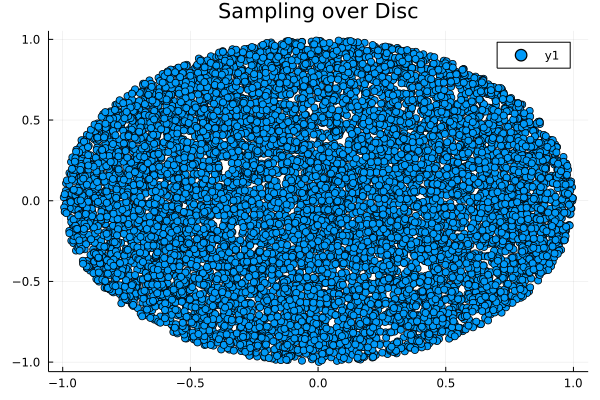

In [3]:
global MAX=zeros(0,2)
global count=0
global n=0
while count<10000
    X,iter=pDimSphere(2)
    global n=n+iter
    MAX=vcat(MAX, reshape(X,(1,2)))
    global count=count+1
end

println("Avg Iterations:",n/10000)
p=2
g=gamma(p/2+1)
f=g/(pi^(p/2))
f=f*(2^p)
println("Expected Iterations:",f)


plot(MAX[:,1],MAX[:,2],seriestype = :scatter, title = "Sampling over Disc")

Avg Iterations:1.9261
Expected Iterations:1.909859317102744


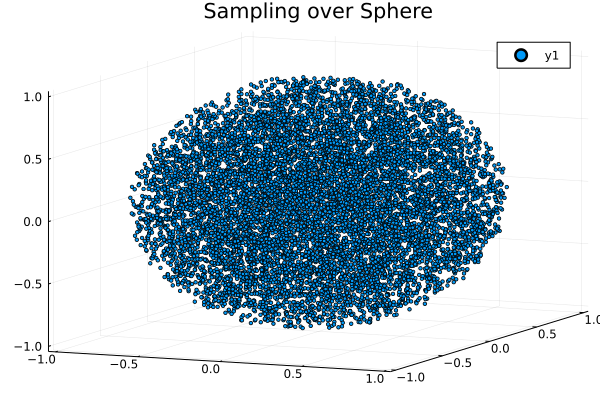

In [4]:
global points=zeros(0,3)
global n=0
for m in 1:10000
    X,iter=pDimSphere(3)
    points=vcat(points, reshape(X,(1,3)))
    global n=n+iter
end

println("Avg Iterations:",n/10000)
p=3
g=gamma(p/2+1)
f=g/(pi^(p/2))
f=f*(2^p)
println("Expected Iterations:",f)
plt3d= Plots.plot(points[:,1],points[:,2], points[:,3],seriestype=:scatter, markersize = 2, title="Sampling over Sphere")
display(plt3d)

In [5]:
global points=zeros(0,4)
global n=0
for m in 1:10000
    X,iter=pDimSphere(4)
    points=vcat(points, reshape(X,(1,4)))
    global n=n+iter
end

println("Avg Iterations:",n/10000)
p=4
g=gamma(p/2+1)
f=g/(pi^(p/2))
f=f*(2^p)
println("Expected Iterations:",f)

Avg Iterations:3.2373
Expected Iterations:3.242277876554809


In [6]:
global points=zeros(0,5)
global n=0
for m in 1:10000
    X,iter=pDimSphere(5)
    points=vcat(points, reshape(X,(1,5)))
    global n=n+iter
end

println("Avg Iterations:",n/10000)
p=5
g=gamma(p/2+1)
f=g/(pi^(p/2))
f=f*(2^p)
println("Expected Iterations:",f)

Avg Iterations:6.0358
Expected Iterations:6.0792710185402665


We notice that as $p$ increases, the number of iterations required to sample a point increases.

# Question 3:  AR Truncated Normal Distribution

In [7]:
function CDFDiff(a)
    a1=cdf.(Normal(),a)
    a2=cdf.(Normal(),-a)
    a3=a1-a2
    return a3
end

CDFDiff (generic function with 1 method)

In [8]:
function TruncNormal(x,a)
    if(x>=-a && x<=a)
        t=exp(-x*x*0.5)/(CDFDiff(a)*((2*pi)^0.5))
        return t
    else
        return 0
    end    
end

TruncNormal (generic function with 1 method)

In [12]:
function TruncSample(a)
    global num_samples=100000
    global c=1/CDFDiff(a)
    global c=c*2
    global Sampling=[]
    while(num_samples>0)
        u=rand(Uniform(0,1))
        global y=rand(Normal())
        while (y>a || y<-a)
            global y=rand(Normal())
        end
        qy=TruncNormal(y,a)
        py=pdf(Normal(), y)
        if((py/qy) > c)
            println("Choose bigger c")
            return
        end
        if(u<(py/(c*qy)))
            append!(Sampling,y)
            global num_samples=num_samples-1
        end
    end
    println("Average is: ", mean(Sampling))
    println("Expectation is: ", 0) 
    println("Variance of selfmade is: ", var(Sampling))
    println("Variance of actual is: ", 1-2*TruncNormal(a,a))
    
    p1=plot(histogram(Sampling,label="SelfMade",xlims=(-a,a)))
    p2=plot(TruncatedNormal(0, 1, -a, a),color="red",xlims=(-a,a),label="BuiltIn",ylims=(0,TruncNormal(0,a)))
    p3=plot(p1,p2,layout=(1,2))
    display(p3)
    return
end

TruncSample (generic function with 1 method)

Calculating Mean and Variance of Truncated Normal: https://en.wikipedia.org/wiki/Truncated_normal_distribution

Average is: 0.0013567995580478418
Expectation is: 0
Variance of selfmade is: 0.9916889662454229
Variance of actual is: 0.9997323225931185


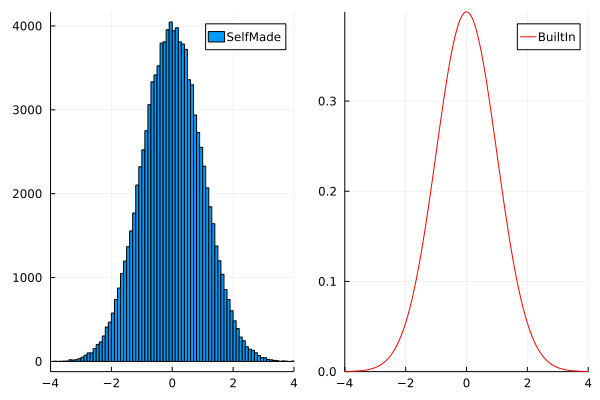

In [13]:
TruncSample(4)

Average is: 1.069286538002217e-5
Expectation is: 0
Variance of selfmade is: 0.29004544212034633
Variance of actual is: 0.29112509477279325


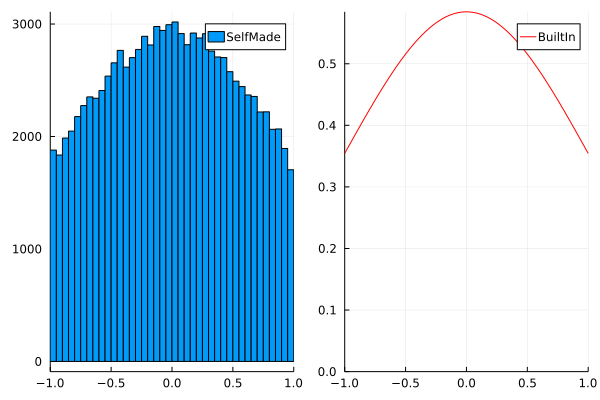

In [14]:
TruncSample(1)